In [1]:
import bz2
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
import predictors as p

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
print(os.getcwd())

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/omarchavez/UT/communal_monte_carlo


In [2]:
import math
def get_hour(x):
    return int(math.floor(x / 100.0))

def get_items_greater_than_cut(series, cut=50):
    counts = series.value_counts()
    index = counts.index.values[counts >= cut]
    return(list(index))

def get_dep_arr_time_buckets(X):
    X_CRS_DEP_ARR_TIME = pd.DataFrame(
        {
            'CRS_DEP_TIME_BLK_0600-0659':((X.CRS_DEP_TIME >=  600) & (X.CRS_DEP_TIME <=  659)).apply(int),
            'CRS_DEP_TIME_BLK_0700-0759':((X.CRS_DEP_TIME >=  700) & (X.CRS_DEP_TIME <=  759)).apply(int),
            'CRS_DEP_TIME_BLK_0800-0859':((X.CRS_DEP_TIME >=  800) & (X.CRS_DEP_TIME <=  859)).apply(int),
            'CRS_DEP_TIME_BLK_0900-0959':((X.CRS_DEP_TIME >=  900) & (X.CRS_DEP_TIME <=  959)).apply(int),
            'CRS_DEP_TIME_BLK_1000-1059':((X.CRS_DEP_TIME >= 1000) & (X.CRS_DEP_TIME <= 1059)).apply(int),
            'CRS_DEP_TIME_BLK_1100-1159':((X.CRS_DEP_TIME >= 1100) & (X.CRS_DEP_TIME <= 1159)).apply(int),
            'CRS_DEP_TIME_BLK_1200-1259':((X.CRS_DEP_TIME >= 1200) & (X.CRS_DEP_TIME <= 1259)).apply(int),
            'CRS_DEP_TIME_BLK_1300-1359':((X.CRS_DEP_TIME >= 1300) & (X.CRS_DEP_TIME <= 1359)).apply(int),
            'CRS_DEP_TIME_BLK_1400-1459':((X.CRS_DEP_TIME >= 1400) & (X.CRS_DEP_TIME <= 1459)).apply(int),
            'CRS_DEP_TIME_BLK_1500-1559':((X.CRS_DEP_TIME >= 1500) & (X.CRS_DEP_TIME <= 1559)).apply(int),
            'CRS_DEP_TIME_BLK_1600-1659':((X.CRS_DEP_TIME >= 1600) & (X.CRS_DEP_TIME <= 1659)).apply(int),
            'CRS_DEP_TIME_BLK_1700-1759':((X.CRS_DEP_TIME >= 1700) & (X.CRS_DEP_TIME <= 1759)).apply(int),
            'CRS_DEP_TIME_BLK_1800-1859':((X.CRS_DEP_TIME >= 1800) & (X.CRS_DEP_TIME <= 1859)).apply(int),
            'CRS_DEP_TIME_BLK_1900-1959':((X.CRS_DEP_TIME >= 1900) & (X.CRS_DEP_TIME <= 1959)).apply(int),
            'CRS_DEP_TIME_BLK_2000-2059':((X.CRS_DEP_TIME >= 2000) & (X.CRS_DEP_TIME <= 2059)).apply(int),
            'CRS_DEP_TIME_BLK_2100-2159':((X.CRS_DEP_TIME >= 2100) & (X.CRS_DEP_TIME <= 2159)).apply(int),
            'CRS_DEP_TIME_BLK_2200-2259':((X.CRS_DEP_TIME >= 2200) & (X.CRS_DEP_TIME <= 2259)).apply(int),
            'CRS_DEP_TIME_BLK_2300-2359':((X.CRS_DEP_TIME >= 2300) & (X.CRS_DEP_TIME <= 2359)).apply(int),
            
            'CRS_ARR_TIME_BLK_0600-0659':((X.CRS_ARR_TIME >=  600) & (X.CRS_ARR_TIME <=  659)).apply(int),
            'CRS_ARR_TIME_BLK_0700-0759':((X.CRS_ARR_TIME >=  700) & (X.CRS_ARR_TIME <=  759)).apply(int),
            'CRS_ARR_TIME_BLK_0800-0859':((X.CRS_ARR_TIME >=  800) & (X.CRS_ARR_TIME <=  859)).apply(int),
            'CRS_ARR_TIME_BLK_0900-0959':((X.CRS_ARR_TIME >=  900) & (X.CRS_ARR_TIME <=  959)).apply(int),
            'CRS_ARR_TIME_BLK_1000-1059':((X.CRS_ARR_TIME >= 1000) & (X.CRS_ARR_TIME <= 1059)).apply(int),
            'CRS_ARR_TIME_BLK_1100-1159':((X.CRS_ARR_TIME >= 1100) & (X.CRS_ARR_TIME <= 1159)).apply(int),
            'CRS_ARR_TIME_BLK_1200-1259':((X.CRS_ARR_TIME >= 1200) & (X.CRS_ARR_TIME <= 1259)).apply(int),
            'CRS_ARR_TIME_BLK_1300-1359':((X.CRS_ARR_TIME >= 1300) & (X.CRS_ARR_TIME <= 1359)).apply(int),
            'CRS_ARR_TIME_BLK_1400-1459':((X.CRS_ARR_TIME >= 1400) & (X.CRS_ARR_TIME <= 1459)).apply(int),
            'CRS_ARR_TIME_BLK_1500-1559':((X.CRS_ARR_TIME >= 1500) & (X.CRS_ARR_TIME <= 1559)).apply(int),
            'CRS_ARR_TIME_BLK_1600-1659':((X.CRS_ARR_TIME >= 1600) & (X.CRS_ARR_TIME <= 1659)).apply(int),
            'CRS_ARR_TIME_BLK_1700-1759':((X.CRS_ARR_TIME >= 1700) & (X.CRS_ARR_TIME <= 1759)).apply(int),
            'CRS_ARR_TIME_BLK_1800-1859':((X.CRS_ARR_TIME >= 1800) & (X.CRS_ARR_TIME <= 1859)).apply(int),
            'CRS_ARR_TIME_BLK_1900-1959':((X.CRS_ARR_TIME >= 1900) & (X.CRS_ARR_TIME <= 1959)).apply(int),
            'CRS_ARR_TIME_BLK_2000-2059':((X.CRS_ARR_TIME >= 2000) & (X.CRS_ARR_TIME <= 2059)).apply(int),
            'CRS_ARR_TIME_BLK_2100-2159':((X.CRS_ARR_TIME >= 2100) & (X.CRS_ARR_TIME <= 2159)).apply(int),
            'CRS_ARR_TIME_BLK_2200-2259':((X.CRS_ARR_TIME >= 2200) & (X.CRS_ARR_TIME <= 2259)).apply(int),
            'CRS_ARR_TIME_BLK_2300-2359':((X.CRS_ARR_TIME >= 2300) & (X.CRS_ARR_TIME <= 2359)).apply(int),
        }
    )
    return X_CRS_DEP_ARR_TIME

ARR_DEP_COLUMNS = [
    'CRS_DEP_TIME_BLK_0600-0659',
    'CRS_DEP_TIME_BLK_0700-0759',
    'CRS_DEP_TIME_BLK_0800-0859',
    'CRS_DEP_TIME_BLK_0900-0959',
    'CRS_DEP_TIME_BLK_1000-1059',
    'CRS_DEP_TIME_BLK_1100-1159',
    'CRS_DEP_TIME_BLK_1200-1259',
    'CRS_DEP_TIME_BLK_1300-1359',
    'CRS_DEP_TIME_BLK_1400-1459',
    'CRS_DEP_TIME_BLK_1500-1559',
    'CRS_DEP_TIME_BLK_1600-1659',
    'CRS_DEP_TIME_BLK_1700-1759',
    'CRS_DEP_TIME_BLK_1800-1859',
    'CRS_DEP_TIME_BLK_1900-1959',
    'CRS_DEP_TIME_BLK_2000-2059',
    'CRS_DEP_TIME_BLK_2100-2159',
    'CRS_DEP_TIME_BLK_2200-2259',
    'CRS_DEP_TIME_BLK_2300-2359',
    
    'CRS_ARR_TIME_BLK_0600-0659',
    'CRS_ARR_TIME_BLK_0700-0759',
    'CRS_ARR_TIME_BLK_0800-0859',
    'CRS_ARR_TIME_BLK_0900-0959',
    'CRS_ARR_TIME_BLK_1000-1059',
    'CRS_ARR_TIME_BLK_1100-1159',
    'CRS_ARR_TIME_BLK_1200-1259',
    'CRS_ARR_TIME_BLK_1300-1359',
    'CRS_ARR_TIME_BLK_1400-1459',
    'CRS_ARR_TIME_BLK_1500-1559',
    'CRS_ARR_TIME_BLK_1600-1659',
    'CRS_ARR_TIME_BLK_1700-1759',
    'CRS_ARR_TIME_BLK_1800-1859',
    'CRS_ARR_TIME_BLK_1900-1959',
    'CRS_ARR_TIME_BLK_2000-2059',
    'CRS_ARR_TIME_BLK_2100-2159',
    'CRS_ARR_TIME_BLK_2200-2259',
    'CRS_ARR_TIME_BLK_2300-2359',
]

Tau_inv_std = 7.126000036325743e-05

Bo_std = 0.7050189962381777

#### time since start time in minutesget all cariers, origins and destinations

In [3]:
year_month_files = [
     '2012_November'
    ,'2012_December'
    ,'2013_January'
    ,'2013_February'
    ,'2013_March'
    ,'2013_April'
    ,'2013_May'
    ,'2013_June'
    ,'2013_July'
    ,'2013_August'
    ,'2013_September'
    ,'2013_October'
]

In [4]:
unique_CARRIER = set()
unique_ORIGIN = set()
unique_DEST = set()
cut = 20 #150 #250 #100

for ymi in range(len(year_month_files)):
    path = 'data/hold/' + year_month_files[ymi] + '.csv'
    print(path)
    df = pd.read_csv(path)
    
    days_of_month = df.DAY_OF_MONTH.unique()
    days_of_month = np.sort(days_of_month)
    
    for domi in range(len(days_of_month)):

        dom_df = df.loc[df.DAY_OF_MONTH == days_of_month[domi],:]
        dom_df = dom_df.reset_index(drop=True)
        
        if (ymi == 0) & (domi == 0):
            unique_CARRIER = (set(get_items_greater_than_cut(dom_df.CARRIER, cut = cut)))
            unique_ORIGIN = (set(get_items_greater_than_cut(dom_df.ORIGIN, cut = cut)))
            unique_DEST = (set(get_items_greater_than_cut(dom_df.DEST, cut = cut)))
        else:
            unique_CARRIER.intersection_update(set(get_items_greater_than_cut(dom_df.CARRIER, cut = cut)))
            unique_ORIGIN.intersection_update(set(get_items_greater_than_cut(dom_df.ORIGIN, cut = cut)))
            unique_DEST.intersection_update(set(get_items_greater_than_cut(dom_df.DEST, cut = cut)))
            
        #if (year_month_files[ymi] == '2013_February') & (days_of_month[domi] == 9):
        #    print(dom_df.ORIGIN.value_counts())
        #if (year_month_files[ymi] == '2013_February') & (days_of_month[domi] == 10):
        #    print(dom_df.ORIGIN.value_counts())

data/hold/2012_November.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2012_December.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (76,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_January.csv
data/hold/2013_February.csv
data/hold/2013_March.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_April.csv
data/hold/2013_May.csv
data/hold/2013_June.csv
data/hold/2013_July.csv
data/hold/2013_August.csv
data/hold/2013_September.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data/hold/2013_October.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#unique_CARRIER = set()
#unique_ORIGIN = set()
#unique_DEST = set()
#unique_DEP_TIME_BLK = set()
#cut = 100
#        
#for ymi in range(len(year_month_files)):
#    path = 'data/' + year_month_files[ymi] + '.csv'
#    print(path)
#    df = pd.read_csv(path)
#    if ymi == 0:
#        unique_CARRIER = (set(get_items_greater_than_cut(df.CARRIER, cut = cut)))
#        unique_ORIGIN = (set(get_items_greater_than_cut(df.ORIGIN, cut = cut)))
#        unique_DEST = (set(get_items_greater_than_cut(df.DEST, cut = cut)))
#    else:
#        unique_CARRIER.intersection_update(set(get_items_greater_than_cut(df.CARRIER, cut = cut)))
#        unique_ORIGIN.intersection_update(set(get_items_greater_than_cut(df.ORIGIN, cut = cut)))
#        unique_DEST.intersection_update(set(get_items_greater_than_cut(df.DEST, cut = cut)))
#

In [6]:
import numpy as np

CARRIER_COLS = ['CARRIER_' + item for item in unique_CARRIER]
ORIGIN_COLS  = ['ORIGIN_' + item for item in unique_ORIGIN]
DEST_COLS    = ['DEST_' + item for item in unique_DEST]

CARRIER_COLS.sort()
ORIGIN_COLS.sort()
DEST_COLS.sort()

print(CARRIER_COLS)
print(ORIGIN_COLS)
print(DEST_COLS)

['CARRIER_AA', 'CARRIER_AS', 'CARRIER_B6', 'CARRIER_DL', 'CARRIER_EV', 'CARRIER_F9', 'CARRIER_FL', 'CARRIER_HA', 'CARRIER_MQ', 'CARRIER_OO', 'CARRIER_UA', 'CARRIER_US', 'CARRIER_VX', 'CARRIER_WN', 'CARRIER_YV']
['ORIGIN_ABQ', 'ORIGIN_ANC', 'ORIGIN_ATL', 'ORIGIN_AUS', 'ORIGIN_BDL', 'ORIGIN_BHM', 'ORIGIN_BNA', 'ORIGIN_BOS', 'ORIGIN_BUF', 'ORIGIN_BUR', 'ORIGIN_BWI', 'ORIGIN_CHS', 'ORIGIN_CLE', 'ORIGIN_CLT', 'ORIGIN_CMH', 'ORIGIN_CVG', 'ORIGIN_DAL', 'ORIGIN_DCA', 'ORIGIN_DEN', 'ORIGIN_DFW', 'ORIGIN_DTW', 'ORIGIN_ELP', 'ORIGIN_EWR', 'ORIGIN_FAT', 'ORIGIN_FLL', 'ORIGIN_HNL', 'ORIGIN_HOU', 'ORIGIN_IAD', 'ORIGIN_IAH', 'ORIGIN_IND', 'ORIGIN_JAX', 'ORIGIN_JFK', 'ORIGIN_KOA', 'ORIGIN_LAS', 'ORIGIN_LAX', 'ORIGIN_LGA', 'ORIGIN_LGB', 'ORIGIN_LIH', 'ORIGIN_LIT', 'ORIGIN_MCI', 'ORIGIN_MCO', 'ORIGIN_MDW', 'ORIGIN_MEM', 'ORIGIN_MIA', 'ORIGIN_MKE', 'ORIGIN_MSP', 'ORIGIN_MSY', 'ORIGIN_OAK', 'ORIGIN_OGG', 'ORIGIN_OKC', 'ORIGIN_OMA', 'ORIGIN_ONT', 'ORIGIN_ORD', 'ORIGIN_ORF', 'ORIGIN_PBI', 'ORIGIN_PDX', 'ORI

In [7]:
WRITE_COLUMNS = (
    ['intercept'] + 
    CARRIER_COLS + 
    ORIGIN_COLS + 
    DEST_COLS + 
    ARR_DEP_COLUMNS + 
    ["y", "Tau_inv_std", "Bo_std", "time"]
)

PREDICTORS = (
    ['intercept'] + 
    CARRIER_COLS + #this may need to be [1:]
    ORIGIN_COLS + 
    DEST_COLS + 
    ARR_DEP_COLUMNS 
)

In [8]:
total_cat_count = len(unique_CARRIER) + len(unique_ORIGIN) + len(unique_DEST)

for ymi in range(len(year_month_files)):

    path = 'data/hold/' + year_month_files[ymi] + '.csv'
    print(path)
    df = pd.read_csv(path)
    print("shape: ", df.shape)
    # drop rows of cancelled flights
    has_time = ~df.DEP_TIME.isna()
    df = df.loc[has_time, :]
    print("shape: ", df.shape)
    # drop rows of no event record
    has_event = ~df.ARR_DEL15.isna()
    df = df.loc[has_event, :]
    print("shape: ", df.shape)
    
    #drop rows with low count categories
    #df = df.loc[df.CARRIER.isin(unique_CARRIER),:]
    #df = df.loc[df.ORIGIN.isin(unique_ORIGIN),:]
    #df = df.loc[df.DEST.isin(unique_DEST),:]
    #df = df.reset_index(drop=True)
    
    # add minutes since start of recorded time    
    
    df = df.sort_values(by=['YEAR','MONTH','DAY_OF_MONTH','DEP_TIME'])
    df = df.reset_index(drop=True)
    print("shape: ", df.shape)
    
    start_time = datetime.datetime(2012, 11, 1)
    date_df = df[['YEAR','MONTH','DAY_OF_MONTH']]
    date_df.columns = ['YEAR','MONTH','DAY']
    
    date_df['HOUR'] = df.DEP_TIME.apply(get_hour)
    date_df['MINUTE'] = df.DEP_TIME % 60

    df['datetime_DEP_TIME'] = pd.to_datetime(date_df[['YEAR','MONTH','DAY', 'HOUR', 'MINUTE']])
    print("shape: ", df.shape)
    
    # get categorical predictors
    carrier_dummies = pd.get_dummies(df.CARRIER, drop_first=False)
    carrier_dummies = carrier_dummies.add_prefix('CARRIER_')
    print("carrier_dummies: ", carrier_dummies.shape)
    origin_dummies = pd.get_dummies(df.ORIGIN, drop_first=False)
    origin_dummies = origin_dummies.add_prefix('ORIGIN_')
    print("origin_dummies: ", origin_dummies.shape)
    dest_dummies = pd.get_dummies(df.DEST, drop_first=False)
    dest_dummies = dest_dummies.add_prefix('DEST_')
    print("dest_dummies: ", dest_dummies.shape)
    
    arr_dep_time_dummies = get_dep_arr_time_buckets(X = df).reset_index(drop=True)
    print("arr_dep_time_dummies: ", arr_dep_time_dummies.shape)
    
    day_of_week_dummies = pd.get_dummies(df.DAY_OF_WEEK, drop_first=False)
    day_of_week_dummies = day_of_week_dummies.add_prefix('DAY_OF_WEEK_')
    print("day_of_week_dummies: ", day_of_week_dummies.shape)
    
    # intercept
    INT = pd.DataFrame({'intercept':np.ones(df.shape[0])})
    
    # compile results
    write_df = pd.concat(
        [df, carrier_dummies, origin_dummies, dest_dummies, arr_dep_time_dummies, day_of_week_dummies, INT], axis = 1
    )
    print("write_df: ", write_df.shape)
    write_df = write_df.loc[:,WRITE_COLUMNS]
    write_df['y'] = df.ARR_DEL15
    write_df['Tau_inv_std'] = Tau_inv_std
    write_df['Bo_std'] = Bo_std
    write_df['time'] =  np.floor(
        pd.to_timedelta(df['datetime_DEP_TIME'] - start_time
    ).dt.total_seconds()/60)
    write_df = write_df.sort_values(by=['time'])
    write_df = write_df.dropna(axis='columns')
    
    days_of_month = df.DAY_OF_MONTH.unique()
    days_of_month = np.sort(days_of_month)
    for domi in range(len(days_of_month)):
        print("DAY = ", days_of_month[domi])
        dom_write_df = write_df.loc[df.DAY_OF_MONTH == days_of_month[domi],:]
        dom_write_df = dom_write_df.reset_index(drop=True)
        
        print("dom_write_df: ", dom_write_df.shape)

        if dom_write_df.isnull().values.any():
            print("WARNING - MISSING VALUES IN DAY", days_of_month[domi])
                    
        out_path = 'data/X_' + year_month_files[ymi] + "_" + str(days_of_month[domi]) + '.csv'
        dom_write_df.to_csv(out_path, index=False)

data/hold/2012_November.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape:  (488006, 110)
shape:  (483105, 110)
shape:  (482202, 110)
shape:  (482202, 110)


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


shape:  (482202, 111)
carrier_dummies:  (482202, 15)
origin_dummies:  (482202, 297)
dest_dummies:  (482202, 297)
arr_dep_time_dummies:  (482202, 36)
day_of_week_dummies:  (482202, 7)
write_df:  (482202, 764)


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


DAY =  1
dom_write_df:  (16767, 213)
DAY =  2
dom_write_df:  (17337, 213)
DAY =  3
dom_write_df:  (13540, 213)
DAY =  4
dom_write_df:  (16360, 213)
DAY =  5
dom_write_df:  (17141, 213)
DAY =  6
dom_write_df:  (15642, 213)
DAY =  7
dom_write_df:  (15709, 213)
DAY =  8
dom_write_df:  (17035, 213)
DAY =  9
dom_write_df:  (17292, 213)
DAY =  10
dom_write_df:  (13477, 213)
DAY =  11
dom_write_df:  (16269, 213)
DAY =  12
dom_write_df:  (17251, 213)
DAY =  13
dom_write_df:  (16423, 213)
DAY =  14
dom_write_df:  (16779, 213)
DAY =  15
dom_write_df:  (17391, 213)
DAY =  16
dom_write_df:  (17421, 213)
DAY =  17
dom_write_df:  (13938, 213)
DAY =  18
dom_write_df:  (15904, 213)
DAY =  19
dom_write_df:  (16120, 213)
DAY =  20
dom_write_df:  (16718, 213)
DAY =  21
dom_write_df:  (17469, 213)
DAY =  22
dom_write_df:  (10740, 213)
DAY =  23
dom_write_df:  (12860, 213)
DAY =  24
dom_write_df:  (15564, 213)
DAY =  25
dom_write_df:  (17737, 213)
DAY =  26
dom_write_df:  (17766, 213)
DAY =  27
dom_write_d

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (76,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape:  (494218, 110)
shape:  (486534, 110)
shape:  (485120, 110)
shape:  (485120, 110)


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


shape:  (485120, 111)
carrier_dummies:  (485120, 15)
origin_dummies:  (485120, 299)
dest_dummies:  (485120, 299)
arr_dep_time_dummies:  (485120, 36)
day_of_week_dummies:  (485120, 7)
write_df:  (485120, 768)
DAY =  1
dom_write_df:  (13152, 213)
DAY =  2
dom_write_df:  (15698, 213)
DAY =  3
dom_write_df:  (16649, 213)
DAY =  4
dom_write_df:  (15845, 213)
DAY =  5
dom_write_df:  (16127, 213)
DAY =  6
dom_write_df:  (16813, 213)
DAY =  7
dom_write_df:  (16833, 213)
DAY =  8
dom_write_df:  (13231, 213)
DAY =  9
dom_write_df:  (15562, 213)
DAY =  10
dom_write_df:  (16371, 213)
DAY =  11
dom_write_df:  (15847, 213)
DAY =  12
dom_write_df:  (16266, 213)
DAY =  13
dom_write_df:  (16887, 213)
DAY =  14
dom_write_df:  (17028, 213)
DAY =  15
dom_write_df:  (13452, 213)
DAY =  16
dom_write_df:  (15720, 213)
DAY =  17
dom_write_df:  (16182, 213)
DAY =  18
dom_write_df:  (16082, 213)
DAY =  19
dom_write_df:  (16819, 213)
DAY =  20
dom_write_df:  (16248, 213)
DAY =  21
dom_write_df:  (17087, 213)
DAY

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape:  (509519, 110)
shape:  (502355, 110)
shape:  (500827, 110)
shape:  (500827, 110)
shape:  (500827, 111)
carrier_dummies:  (500827, 16)
origin_dummies:  (500827, 306)
dest_dummies:  (500827, 306)
arr_dep_time_dummies:  (500827, 36)
day_of_week_dummies:  (500827, 7)
write_df:  (500827, 783)
DAY =  1
dom_write_df:  (15082, 213)
DAY =  2
dom_write_df:  (17925, 213)
DAY =  3
dom_write_df:  (17616, 213)
DAY =  4
dom_write_df:  (17523, 213)
DAY =  5
dom_write_df:  (13893, 213)
DAY =  6
dom_write_df:  (16346, 213)
DAY =  7
dom_write_df:  (17292, 213)
DAY =  8
dom_write_df:  (16259, 213)
DAY =  9
dom_write_df:  (16590, 213)
DAY =  10
dom_write_df:  (17285, 213)
DAY =  11
dom_write_df:  (17140, 213)
DAY =  12
dom_write_df:  (13147, 213)
DAY =  13
dom_write_df:  (15795, 213)
DAY =  14
dom_write_df:  (17037, 213)
DAY =  15
dom_write_df:  (15711, 213)
DAY =  16
dom_write_df:  (16358, 213)
DAY =  17
dom_write_df:  (17133, 213)
DAY =  18
dom_write_df:  (17287, 213)
DAY =  19
dom_write_df:  (131

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape:  (552312, 110)
shape:  (543706, 110)
shape:  (542417, 110)
shape:  (542417, 110)
shape:  (542417, 111)
carrier_dummies:  (542417, 16)
origin_dummies:  (542417, 307)
dest_dummies:  (542417, 307)
arr_dep_time_dummies:  (542417, 36)
day_of_week_dummies:  (542417, 7)
write_df:  (542417, 785)
DAY =  1
dom_write_df:  (17903, 213)
DAY =  2
dom_write_df:  (14897, 213)
DAY =  3
dom_write_df:  (17230, 213)
DAY =  4
dom_write_df:  (18128, 213)
DAY =  5
dom_write_df:  (16446, 213)
DAY =  6
dom_write_df:  (16649, 213)
DAY =  7
dom_write_df:  (18202, 213)
DAY =  8
dom_write_df:  (17956, 213)
DAY =  9
dom_write_df:  (14645, 213)
DAY =  10
dom_write_df:  (17495, 213)
DAY =  11
dom_write_df:  (18453, 213)
DAY =  12
dom_write_df:  (17825, 213)
DAY =  13
dom_write_df:  (18100, 213)
DAY =  14
dom_write_df:  (18637, 213)
DAY =  15
dom_write_df:  (18643, 213)
DAY =  16
dom_write_df:  (15416, 213)
DAY =  17
dom_write_df:  (17618, 213)
DAY =  18
dom_write_df:  (18030, 213)
DAY =  19
dom_write_df:  (176

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape:  (510806, 110)
shape:  (506695, 110)
shape:  (505340, 110)
shape:  (505340, 110)
shape:  (505340, 111)
carrier_dummies:  (505340, 16)
origin_dummies:  (505340, 307)
dest_dummies:  (505340, 307)
arr_dep_time_dummies:  (505340, 36)
day_of_week_dummies:  (505340, 7)
write_df:  (505340, 785)
DAY =  1
dom_write_df:  (12998, 213)
DAY =  2
dom_write_df:  (16705, 213)
DAY =  3
dom_write_df:  (17622, 213)
DAY =  4
dom_write_df:  (17470, 213)
DAY =  5
dom_write_df:  (18025, 213)
DAY =  6
dom_write_df:  (18090, 213)
DAY =  7
dom_write_df:  (13570, 213)
DAY =  8
dom_write_df:  (17250, 213)
DAY =  9
dom_write_df:  (17974, 213)
DAY =  10
dom_write_df:  (16959, 213)
DAY =  11
dom_write_df:  (17138, 213)
DAY =  12
dom_write_df:  (17358, 213)
DAY =  13
dom_write_df:  (18007, 213)
DAY =  14
dom_write_df:  (13424, 213)
DAY =  15
dom_write_df:  (17183, 213)
DAY =  16
dom_write_df:  (17984, 213)
DAY =  17
dom_write_df:  (16957, 213)
DAY =  18
dom_write_df:  (17422, 213)
DAY =  19
dom_write_df:  (175

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape:  (535344, 110)
shape:  (532245, 110)
shape:  (531321, 110)
shape:  (531321, 110)
shape:  (531321, 111)
carrier_dummies:  (531321, 16)
origin_dummies:  (531321, 303)
dest_dummies:  (531321, 303)
arr_dep_time_dummies:  (531321, 36)
day_of_week_dummies:  (531321, 7)
write_df:  (531321, 777)
DAY =  1
dom_write_df:  (17049, 213)
DAY =  2
dom_write_df:  (17596, 213)
DAY =  3
dom_write_df:  (18071, 213)
DAY =  4
dom_write_df:  (18061, 213)
DAY =  5
dom_write_df:  (13633, 213)
DAY =  6
dom_write_df:  (17211, 213)
DAY =  7
dom_write_df:  (17944, 213)
DAY =  8
dom_write_df:  (17281, 213)
DAY =  9
dom_write_df:  (17619, 213)
DAY =  10
dom_write_df:  (18185, 213)
DAY =  11
dom_write_df:  (18008, 213)
DAY =  12
dom_write_df:  (13527, 213)
DAY =  13
dom_write_df:  (17067, 213)
DAY =  14
dom_write_df:  (18106, 213)
DAY =  15
dom_write_df:  (17261, 213)
DAY =  16
dom_write_df:  (17691, 213)
DAY =  17
dom_write_df:  (18225, 213)
DAY =  18
dom_write_df:  (18180, 213)
DAY =  19
dom_write_df:  (137

In [9]:
#save parameter values for each month for each parameter in matrix of shape
# Betas count X Months to get a feel for Tau_inv_std
all_params = np.zeros((12*31,len(PREDICTORS)))
params_flat = []
counter = 0
for fn in range(len(year_month_files)):
    
    for domi in range(1,32):
        path = 'data/X_'+ year_month_files[fn]+'_'+str(domi)+ '.csv'
        print(path)
        if os.path.isfile(path):
            
            try:
                first_df = pd.read_csv(path)
                good_df = first_df
                X = good_df.loc[:, PREDICTORS]
                y = good_df.loc[:,['y']]
                
                logit_model=sm.Logit(y,X)
                result=logit_model.fit()
                all_params[counter, :] = result.params.values
                counter += 1
                params_flat = np.concatenate([params_flat, result.params.values])
                if (fn == 0) & (domi==1):
                    all_diffs = params_flat
                    last_set = result
                else:
                    all_diffs = np.concatenate([all_diffs, result.params.values - last_set.params.values])
                    last_set = result
            except Exception:
                print("****************************************************")
                print("****************** BAD DAT TO FLY ******************")
                print(path)
                print("****************************************************")

data/X_2012_November_1.csv
         Current function value: 0.373521
         Iterations: 35
data/X_2012_November_2.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2012_November_2.csv
****************************************************
data/X_2012_November_3.csv
         Current function value: 0.262163
         Iterations: 35
data/X_2012_November_4.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.317943
         Iterations: 35
data/X_2012_November_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.322063
         Iterations: 35
data/X_2012_November_6.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.313406
         Iterations: 35
data/X_2012_November_7.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.342084
         Iterations: 35
data/X_2012_November_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.357909
         Iterations 8
data/X_2012_November_9.csv
Optimization terminated successfully.
         Current function value: 0.366287
         Iterations 7
data/X_2012_November_10.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2012_November_10.csv
****************************************************
data/X_2012_November_11.csv
Optimization terminated successfully.
         Current function value: 0.396479
         Iterations 8
data/X_2012_November_12.csv
Optimization terminated successfully.
         Current function value: 0.434693
         Iterations 8
data/X_2012_November_13.csv
Optimization terminated successfully.
         Current function value: 0.318288
         Iterations 9
data/X_2012_November_14.csv
         Current function value: 0.315493
         Iterations: 35
data/X_20

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.391480
         Iterations: 35
data/X_2012_November_16.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.352181
         Iterations 8
data/X_2012_November_17.csv
         Current function value: 0.300786
         Iterations: 35
data/X_2012_November_18.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.288391
         Iterations 9
data/X_2012_November_19.csv
         Current function value: 0.297049
         Iterations: 35
data/X_2012_November_20.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.307666
         Iterations 8
data/X_2012_November_21.csv
Optimization terminated successfully.
         Current function value: 0.374285
         Iterations 7
data/X_2012_November_22.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2012_November_22.csv
****************************************************
data/X_2012_November_23.csv
         Current function value: 0.237672
         Iterations: 35
data/X_2012_November_24.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.327403
         Iterations 33
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2012_November_24.csv
****************************************************
data/X_2012_November_25.csv
Optimization terminated successfully.
         Current function value: 0.395045
         Iterations 8
data/X_2012_November_26.csv
Optimization terminated successfully.
         Current function value: 0.379721
         Iterations 8
data/X_2012_November_27.csv
         Current function value: 0.385984
         Iterations: 35
data/X_2012_November_28.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.294295
         Iterations: 35
data/X_2012_November_29.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.297736
         Iterations: 35
data/X_2012_November_30.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.326485
         Iterations 8
data/X_2012_November_31.csv
data/X_2012_December_1.csv
         Current function value: 0.297900
         Iterations: 35
data/X_2012_December_2.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.372591
         Iterations 8
data/X_2012_December_3.csv
         Current function value: 0.320236
         Iterations: 35
data/X_2012_December_4.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.275313
         Iterations: 35
data/X_2012_December_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.251313
         Iterations 19
data/X_2012_December_6.csv
         Current function value: 0.270567
         Iterations: 35
data/X_2012_December_7.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.318931
         Iterations: 35
data/X_2012_December_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.314748
         Iterations: 35
data/X_2012_December_9.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.414737
         Iterations: 35
data/X_2012_December_10.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.515262
         Iterations 8
data/X_2012_December_11.csv
         Current function value: 0.342422
         Iterations: 35
data/X_2012_December_12.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.294917
         Iterations: 35
data/X_2012_December_13.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.298123
         Iterations: 35
data/X_2012_December_14.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.342738
         Iterations 8
data/X_2012_December_15.csv
Optimization terminated successfully.
         Current function value: 0.352288
         Iterations 8
data/X_2012_December_16.csv
Optimization terminated successfully.
         Current function value: 0.444586
         Iterations 7
data/X_2012_December_17.csv
Optimization terminated successfully.
         Current function value: 0.477960
         Iterations 7
data/X_2012_December_18.csv
         Current function value: 0.431587
         Iterations: 35
data/X_2012_December_19.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.443413
         Iterations 7
data/X_2012_December_20.csv
         Current function value: 0.555202
         Iterations: 35
data/X_2012_December_21.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.544213
         Iterations 6
data/X_2012_December_22.csv
Optimization terminated successfully.
         Current function value: 0.506493
         Iterations 6
data/X_2012_December_23.csv
Optimization terminated successfully.
         Current function value: 0.434423
         Iterations 7
data/X_2012_December_24.csv
Optimization terminated successfully.
         Current function value: 0.430488
         Iterations 8
data/X_2012_December_25.csv
Optimization terminated successfully.
         Current function value: 0.470019
         Iterations 8
data/X_2012_December_26.csv
Optimization terminated successfully.
         Current function value: 0.565421
         Iterations 7
data/X_2012_December_27.csv
Optimization terminated successfully.
         Current function value: 0.575591
         Iterations 8
data/X_2012_December_28.csv
Optimization terminated successfully.
         Current function value: 0.530028
         I

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.462075
         Iterations 8
data/X_2013_January_4.csv
Optimization terminated successfully.
         Current function value: 0.347936
         Iterations 8
data/X_2013_January_5.csv
Optimization terminated successfully.
         Current function value: 0.380889
         Iterations 8
data/X_2013_January_6.csv
Optimization terminated successfully.
         Current function value: 0.402759
         Iterations 8
data/X_2013_January_7.csv
         Current function value: 0.303096
         Iterations: 35
data/X_2013_January_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.336467
         Iterations 8
data/X_2013_January_9.csv
         Current function value: 0.334374
         Iterations: 35
data/X_2013_January_10.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.345765
         Iterations 8
data/X_2013_January_11.csv
Optimization terminated successfully.
         Current function value: 0.383213
         Iterations 9
data/X_2013_January_12.csv
         Current function value: 0.352538
         Iterations: 35
data/X_2013_January_13.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.463988
         Iterations: 35
data/X_2013_January_14.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.437099
         Iterations 7
data/X_2013_January_15.csv
Optimization terminated successfully.
         Current function value: 0.362383
         Iterations 8
data/X_2013_January_16.csv
         Current function value: 0.428528
         Iterations: 35
data/X_2013_January_17.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.360774
         Iterations: 35
data/X_2013_January_18.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.341787
         Iterations 8
data/X_2013_January_19.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_January_19.csv
****************************************************
data/X_2013_January_20.csv
         Current function value: 0.314704
         Iterations: 35
data/X_2013_January_21.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.378590
         Iterations 8
data/X_2013_January_22.csv
         Current function value: 0.334310
         Iterations: 35
data/X_2013_January_23.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.351643
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_January_23.csv
****************************************************
data/X_2013_January_24.csv
Optimization terminated successfully.
         Current function value: 0.432743
         Iterations 7
data/X_2013_January_25.csv
Optimization terminated successfully.
         Current function value: 0.492386
         Iterations 8
data/X_2013_January_26.csv
Optimization terminated successfully.
         Current function value: 0.347422
         Iterations 19
data/X_2013_January_27.csv
         Current function value: 0.375573
         Iterations: 35
data/X_2013_January_28.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.443519
         Iterations 7
data/X_2013_January_29.csv
Optimization terminated successfully.
         Current function value: 0.393299
         Iterations 8
data/X_2013_January_30.csv
         Current function value: 0.453063
         Iterations: 35
data/X_2013_January_31.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.458084
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_January_31.csv
****************************************************
data/X_2013_February_1.csv
         Current function value: 0.427247
         Iterations: 35
data/X_2013_February_2.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.399540
         Iterations: 35
data/X_2013_February_3.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.354600
         Iterations: 35
data/X_2013_February_4.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.447411
         Iterations: 35
data/X_2013_February_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.307699
         Iterations: 35
data/X_2013_February_6.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.309444
         Iterations: 35
data/X_2013_February_7.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.396827
         Iterations: 35
data/X_2013_February_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.402000
         Iterations: 35
data/X_2013_February_9.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.301454
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_February_9.csv
****************************************************
data/X_2013_February_10.csv
Optimization terminated successfully.
         Current function value: 0.467323
         Iterations 8
data/X_2013_February_11.csv
         Current function value: 0.466917
         Iterations: 35
data/X_2013_February_12.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.308597
         Iterations 28
data/X_2013_February_13.csv
         Current function value: 0.326241
         Iterations: 35
data/X_2013_February_14.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.345913
         Iterations 8
data/X_2013_February_15.csv
         Current function value: 0.338378
         Iterations: 35
data/X_2013_February_16.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.373368
         Iterations: 35
data/X_2013_February_17.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.343359
         Iterations 8
data/X_2013_February_18.csv
         Current function value: 0.366909
         Iterations: 35
data/X_2013_February_19.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.427179
         Iterations: 35
data/X_2013_February_20.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.392593
         Iterations 9
data/X_2013_February_21.csv
Optimization terminated successfully.
         Current function value: 0.482427
         Iterations 7
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_February_21.csv
****************************************************
data/X_2013_February_22.csv
Optimization terminated successfully.
         Current function value: 0.500013
         Iterations 7
data/X_2013_February_23.csv
Optimization terminated successfully.
         Current function value: 0.433139
         Iterations 7
data/X_2013_February_24.csv
Optimization terminated successfully.
         Current function value: 0.343993
         Iterations 8
data/X_2013_February_25.csv
         Current function value: 0.404694
         Iterations: 35
data/X_2013_February_26.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.471233
         Iterations: 35
data/X_2013_February_27.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_February_27.csv
****************************************************
data/X_2013_February_28.csv
         Current function value: 0.382603
         Iterations: 35
data/X_2013_February_29.csv
data/X_2013_February_30.csv
data/X_2013_February_31.csv
data/X_2013_March_1.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.445365
         Iterations 7
data/X_2013_March_2.csv
Optimization terminated successfully.
         Current function value: 0.430289
         Iterations 8
data/X_2013_March_3.csv
Optimization terminated successfully.
         Current function value: 0.369801
         Iterations 9
data/X_2013_March_4.csv
         Current function value: 0.360086
         Iterations: 35
data/X_2013_March_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.369930
         Iterations: 35
data/X_2013_March_6.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.389266
         Iterations 16
data/X_2013_March_7.csv
         Current function value: 0.348248
         Iterations: 35
data/X_2013_March_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.436393
         Iterations 7
data/X_2013_March_9.csv
Optimization terminated successfully.
         Current function value: 0.392526
         Iterations 8
data/X_2013_March_10.csv
Optimization terminated successfully.
         Current function value: 0.443680
         Iterations 8
data/X_2013_March_11.csv
Optimization terminated successfully.
         Current function value: 0.449542
         Iterations 8
data/X_2013_March_12.csv
Optimization terminated successfully.
         Current function value: 0.412459
         Iterations 8
data/X_2013_March_13.csv
Optimization terminated successfully.
         Current function value: 0.365555
         Iterations 22
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_March_13.csv
****************************************************
data/X_2013_March_14.csv
Optimization terminated successfully.
         Current

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.275455
         Iterations: 35
data/X_2013_March_31.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.381331
         Iterations: 35
data/X_2013_April_1.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.411057
         Iterations 8
data/X_2013_April_2.csv
Optimization terminated successfully.
         Current function value: 0.362388
         Iterations 7
data/X_2013_April_3.csv
         Current function value: 0.341421
         Iterations: 35
data/X_2013_April_4.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.408707
         Iterations 7
data/X_2013_April_5.csv
Optimization terminated successfully.
         Current function value: 0.392081
         Iterations 8
data/X_2013_April_6.csv
Optimization terminated successfully.
         Current function value: 0.298122
         Iterations 8
data/X_2013_April_7.csv
Optimization terminated successfully.
         Current function value: 0.299616
         Iterations 8
data/X_2013_April_8.csv
Optimization terminated successfully.
         Current function value: 0.406882
         Iterations 8
data/X_2013_April_9.csv
Optimization terminated successfully.
         Current function value: 0.353134
         Iterations 8
data/X_2013_April_10.csv
Optimization terminated successfully.
         Current function value: 0.455511
         Iterations 8
data/X_2013_April_11.csv
Optimization terminated successfully.
         Current function value: 0.506903
         Iterations 7
data/X_2013_Ap

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.441015
         Iterations 7
data/X_2013_April_15.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_April_15.csv
****************************************************
data/X_2013_April_16.csv
Optimization terminated successfully.
         Current function value: 0.382353
         Iterations 8
data/X_2013_April_17.csv
         Current function value: 0.462798
         Iterations: 35
data/X_2013_April_18.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.504575
         Iterations 7
data/X_2013_April_19.csv
Optimization terminated successfully.
         Current function value: 0.545183
         Iterations 8
data/X_2013_April_20.csv
         Current function value: 0.378590
         Iterations: 35
data/X_2013_April_21.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.388751
         Iterations 7
data/X_2013_April_22.csv
Optimization terminated successfully.
         Current function value: 0.463668
         Iterations 7
data/X_2013_April_23.csv
Optimization terminated successfully.
         Current function value: 0.446349
         Iterations 7
data/X_2013_April_24.csv
Optimization terminated successfully.
         Current function value: 0.490824
         Iterations 8
data/X_2013_April_25.csv
Optimization terminated successfully.
         Current function value: 0.439859
         Iterations 7
data/X_2013_April_26.csv
Optimization terminated successfully.
         Current function value: 0.409810
         Iterations 7
data/X_2013_April_27.csv
         Current function value: 0.290926
         Iterations: 35
data/X_2013_April_28.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.384201
         Iterations 7
data/X_2013_April_29.csv
Optimization terminated successfully.
         Current function value: 0.365302
         Iterations 8
data/X_2013_April_30.csv
         Current function value: 0.308600
         Iterations: 35
data/X_2013_April_31.csv
data/X_2013_May_1.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.365560
         Iterations 8
data/X_2013_May_2.csv
Optimization terminated successfully.
         Current function value: 0.435295
         Iterations 7
data/X_2013_May_3.csv
Optimization terminated successfully.
         Current function value: 0.430326
         Iterations 8
data/X_2013_May_4.csv
Optimization terminated successfully.
         Current function value: 0.344297
         Iterations 8
data/X_2013_May_5.csv
Optimization terminated successfully.
         Current function value: 0.374091
         Iterations 8
data/X_2013_May_6.csv
Optimization terminated successfully.
         Current function value: 0.374349
         Iterations 8
data/X_2013_May_7.csv
Optimization terminated successfully.
         Current function value: 0.295697
         Iterations 8
data/X_2013_May_8.csv
Optimization terminated successfully.
         Current function value: 0.405109
         Iterations 8
data/X_2013_May_9.csv
Optimiza

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.437828
         Iterations 8
data/X_2013_May_20.csv
Optimization terminated successfully.
         Current function value: 0.480433
         Iterations 8
data/X_2013_May_21.csv
Optimization terminated successfully.
         Current function value: 0.517282
         Iterations 7
data/X_2013_May_22.csv
Optimization terminated successfully.
         Current function value: 0.462589
         Iterations 7
data/X_2013_May_23.csv
Optimization terminated successfully.
         Current function value: 0.500866
         Iterations 7
data/X_2013_May_24.csv
Optimization terminated successfully.
         Current function value: 0.467925
         Iterations 8
data/X_2013_May_25.csv
Optimization terminated successfully.
         Current function value: 0.357045
         Iterations 8
data/X_2013_May_26.csv
         Current function value: 0.258413
         Iterations: 35
data/X_2013_May_27.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.345369
         Iterations: 35
data/X_2013_May_28.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.415709
         Iterations: 35
data/X_2013_May_29.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.418627
         Iterations 8
data/X_2013_May_30.csv
Optimization terminated successfully.
         Current function value: 0.421691
         Iterations 7
data/X_2013_May_31.csv
Optimization terminated successfully.
         Current function value: 0.439090
         Iterations 7
data/X_2013_June_1.csv
         Current function value: 0.401975
         Iterations: 35
data/X_2013_June_2.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.476211
         Iterations 8
data/X_2013_June_3.csv
Optimization terminated successfully.
         Current function value: 0.440037
         Iterations 7
data/X_2013_June_4.csv
         Current function value: 0.348446
         Iterations: 35
data/X_2013_June_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.412210
         Iterations: 35
data/X_2013_June_6.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.507898
         Iterations 7
data/X_2013_June_7.csv
Optimization terminated successfully.
         Current function value: 0.501142
         Iterations 8
data/X_2013_June_8.csv
Optimization terminated successfully.
         Current function value: 0.379252
         Iterations 9
data/X_2013_June_9.csv
Optimization terminated successfully.
         Current function value: 0.430920
         Iterations 7
data/X_2013_June_10.csv
         Current function value: 0.495901
         Iterations: 35
data/X_2013_June_11.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.465189
         Iterations: 35
data/X_2013_June_12.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.418851
         Iterations 7
data/X_2013_June_13.csv
Optimization terminated successfully.
         Current function value: 0.523170
         Iterations 7
data/X_2013_June_14.csv
Optimization terminated successfully.
         Current function value: 0.527207
         Iterations 7
data/X_2013_June_15.csv
Optimization terminated successfully.
         Current function value: 0.405619
         Iterations 8
data/X_2013_June_16.csv
Optimization terminated successfully.
         Current function value: 0.441302
         Iterations 7
data/X_2013_June_17.csv
         Current function value: 0.490840
         Iterations: 35
data/X_2013_June_18.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.524823
         Iterations 7
data/X_2013_June_19.csv
Optimization terminated successfully.
         Current function value: 0.438806
         Iterations 7
data/X_2013_June_20.csv
Optimization terminated successfully.
         Current function value: 0.397167
         Iterations 7
data/X_2013_June_21.csv
Optimization terminated successfully.
         Current function value: 0.443774
         Iterations 7
data/X_2013_June_22.csv
Optimization terminated successfully.
         Current function value: 0.423869
         Iterations 7
data/X_2013_June_23.csv
Optimization terminated successfully.
         Current function value: 0.467952
         Iterations 7
data/X_2013_June_24.csv
         Current function value: 0.512856
         Iterations: 35
data/X_2013_June_25.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.503804
         Iterations 8
data/X_2013_June_26.csv
Optimization terminated successfully.
         Current function value: 0.510001
         Iterations 7
data/X_2013_June_27.csv
Optimization terminated successfully.
         Current function value: 0.506077
         Iterations 6
data/X_2013_June_28.csv
Optimization terminated successfully.
         Current function value: 0.513504
         Iterations 7
data/X_2013_June_29.csv
Optimization terminated successfully.
         Current function value: 0.541644
         Iterations 7
data/X_2013_June_30.csv
Optimization terminated successfully.
         Current function value: 0.515950
         Iterations 8
data/X_2013_June_31.csv
data/X_2013_July_1.csv
Optimization terminated successfully.
         Current function value: 0.509566
         Iterations 7
data/X_2013_July_2.csv
Optimization terminated successfully.
         Current function value: 0.459686
         Iterati

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.363143
         Iterations 9
data/X_2013_July_6.csv
Optimization terminated successfully.
         Current function value: 0.369618
         Iterations 8
data/X_2013_July_7.csv
Optimization terminated successfully.
         Current function value: 0.474250
         Iterations 8
data/X_2013_July_8.csv
Optimization terminated successfully.
         Current function value: 0.513354
         Iterations 7
data/X_2013_July_9.csv
Optimization terminated successfully.
         Current function value: 0.495610
         Iterations 7
data/X_2013_July_10.csv
Optimization terminated successfully.
         Current function value: 0.503746
         Iterations 7
data/X_2013_July_11.csv
Optimization terminated successfully.
         Current function value: 0.530100
         Iterations 8
data/X_2013_July_12.csv
Optimization terminated successfully.
         Current function value: 0.519406
         Iterations 7
data/X_2013_July_13.

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.459495
         Iterations 7
data/X_2013_July_17.csv
Optimization terminated successfully.
         Current function value: 0.481602
         Iterations 8
data/X_2013_July_18.csv
Optimization terminated successfully.
         Current function value: 0.469332
         Iterations 8
data/X_2013_July_19.csv
Optimization terminated successfully.
         Current function value: 0.462599
         Iterations 7
data/X_2013_July_20.csv
Optimization terminated successfully.
         Current function value: 0.505251
         Iterations 8
data/X_2013_July_21.csv
Optimization terminated successfully.
         Current function value: 0.530453
         Iterations 7
data/X_2013_July_22.csv
Optimization terminated successfully.
         Current function value: 0.519820
         Iterations 7
data/X_2013_July_23.csv
Optimization terminated successfully.
         Current function value: 0.513709
         Iterations 8
data/X_2013_July

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.447499
         Iterations 7
data/X_2013_August_1.csv
Optimization terminated successfully.
         Current function value: 0.472957
         Iterations 8
data/X_2013_August_2.csv
Optimization terminated successfully.
         Current function value: 0.465388
         Iterations 7
data/X_2013_August_3.csv
         Current function value: 0.451451
         Iterations: 35
data/X_2013_August_4.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.426498
         Iterations 7
data/X_2013_August_5.csv
Optimization terminated successfully.
         Current function value: 0.406867
         Iterations 7
data/X_2013_August_6.csv
Optimization terminated successfully.
         Current function value: 0.441564
         Iterations 8
data/X_2013_August_7.csv
Optimization terminated successfully.
         Current function value: 0.509276
         Iterations 8
data/X_2013_August_8.csv
Optimization terminated successfully.
         Current function value: 0.514516
         Iterations 8
data/X_2013_August_9.csv
Optimization terminated successfully.
         Current function value: 0.475940
         Iterations 7
data/X_2013_August_10.csv
Optimization terminated successfully.
         Current function value: 0.455542
         Iterations 8
data/X_2013_August_11.csv
Optimization terminated successfully.
         Current function value: 0.419065
         Iterations 8
data/X_

/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.310728
         Iterations: 35
data/X_2013_August_25.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.351627
         Iterations: 35
data/X_2013_August_26.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.355346
         Iterations 8
data/X_2013_August_27.csv
Optimization terminated successfully.
         Current function value: 0.305678
         Iterations 8
data/X_2013_August_28.csv
Optimization terminated successfully.
         Current function value: 0.364624
         Iterations 8
data/X_2013_August_29.csv
Optimization terminated successfully.
         Current function value: 0.422955
         Iterations 7
data/X_2013_August_30.csv
         Current function value: 0.392113
         Iterations: 35
data/X_2013_August_31.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.373105
         Iterations: 35
data/X_2013_September_1.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_September_1.csv
****************************************************
data/X_2013_September_2.csv
Optimization terminated successfully.
         Current function value: 0.431546
         Iterations 8
data/X_2013_September_3.csv
Optimization terminated successfully.
         Current function value: 0.350242
         Iterations 8
data/X_2013_September_4.csv
         Current function value: 0.302109
         Iterations: 35
data/X_2013_September_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.309794
         Iterations 8
data/X_2013_September_6.csv
         Current function value: 0.312284
         Iterations: 35
data/X_2013_September_7.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.251761
         Iterations: 35
data/X_2013_September_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.323294
         Iterations: 35
data/X_2013_September_9.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.356980
         Iterations 18
data/X_2013_September_10.csv
         Current function value: 0.330004
         Iterations: 35
data/X_2013_September_11.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.365902
         Iterations: 35
data/X_2013_September_12.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450479
         Iterations: 35
data/X_2013_September_13.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.446319
         Iterations 7
data/X_2013_September_14.csv
         Current function value: 0.287268
         Iterations: 35
data/X_2013_September_15.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.388638
         Iterations 7
data/X_2013_September_16.csv
Optimization terminated successfully.
         Current function value: 0.367602
         Iterations 8
data/X_2013_September_17.csv
         Current function value: 0.328574
         Iterations: 35
data/X_2013_September_18.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.336775
         Iterations: 35
data/X_2013_September_19.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.450509
         Iterations 7
data/X_2013_September_20.csv
         Current function value: 0.448616
         Iterations: 35
data/X_2013_September_21.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.351144
         Iterations 8
data/X_2013_September_22.csv
Optimization terminated successfully.
         Current function value: 0.364584
         Iterations 8
data/X_2013_September_23.csv
Optimization terminated successfully.
         Current function value: 0.336391
         Iterations 8
data/X_2013_September_24.csv
         Current function value: 0.302805
         Iterations: 35
data/X_2013_September_25.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.326024
         Iterations 8
data/X_2013_September_26.csv
         Current function value: 0.341016
         Iterations: 35
data/X_2013_September_27.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.359868
         Iterations 8
data/X_2013_September_28.csv
         Current function value: 0.331970
         Iterations: 35
data/X_2013_September_29.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.370284
         Iterations: 35
data/X_2013_September_30.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.312122
         Iterations: 35
data/X_2013_September_31.csv
data/X_2013_October_1.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.251864
         Iterations: 35
data/X_2013_October_2.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.270704
         Iterations 8
data/X_2013_October_3.csv
Optimization terminated successfully.
         Current function value: 0.397988
         Iterations 9
data/X_2013_October_4.csv
         Current function value: 0.411231
         Iterations: 35
data/X_2013_October_5.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.367801
         Iterations: 35
data/X_2013_October_6.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.404968
         Iterations: 35
data/X_2013_October_7.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.430308
         Iterations: 35
data/X_2013_October_8.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.291828
         Iterations 8
data/X_2013_October_9.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_October_9.csv
****************************************************
data/X_2013_October_10.csv
         Current function value: 0.404613
         Iterations: 35
data/X_2013_October_11.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.407542
         Iterations: 35
data/X_2013_October_12.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.339250
         Iterations: 35
data/X_2013_October_13.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.363373
         Iterations 8
data/X_2013_October_14.csv
         Current function value: 0.442977
         Iterations: 35
data/X_2013_October_15.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.401145
         Iterations 8
data/X_2013_October_16.csv
         Current function value: 0.335378
         Iterations: 35
data/X_2013_October_17.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_October_17.csv
****************************************************
data/X_2013_October_18.csv
         Current function value: 0.371282
         Iterations: 35
data/X_2013_October_19.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.320215
         Iterations 21
data/X_2013_October_20.csv
Optimization terminated successfully.
         Current function value: 0.344113
         Iterations 8
data/X_2013_October_21.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_October_21.csv
****************************************************
data/X_2013_October_22.csv
         Current function value: inf
         Iterations: 35
****************************************************
****************** BAD DAT TO FLY ******************
data/X_2013_October_22.csv
****************************************************
data/X_2013_October_23.csv
         Current function value: 0.323952
         Iterations: 35
data/X_2013_October_24.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.400265
         Iterations 7
data/X_2013_October_25.csv
         Current function value: 0.355534
         Iterations: 35
data/X_2013_October_26.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.297647
         Iterations: 35
data/X_2013_October_27.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.360926
         Iterations 8
data/X_2013_October_28.csv
         Current function value: 0.410663
         Iterations: 35
data/X_2013_October_29.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.331398
         Iterations: 35
data/X_2013_October_30.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.400287
         Iterations: 35
data/X_2013_October_31.csv


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.410321
         Iterations: 35


/Users/omarchavez/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [10]:
#result.params.values #- last_set.params.values
fn
domi
#X.head()

31

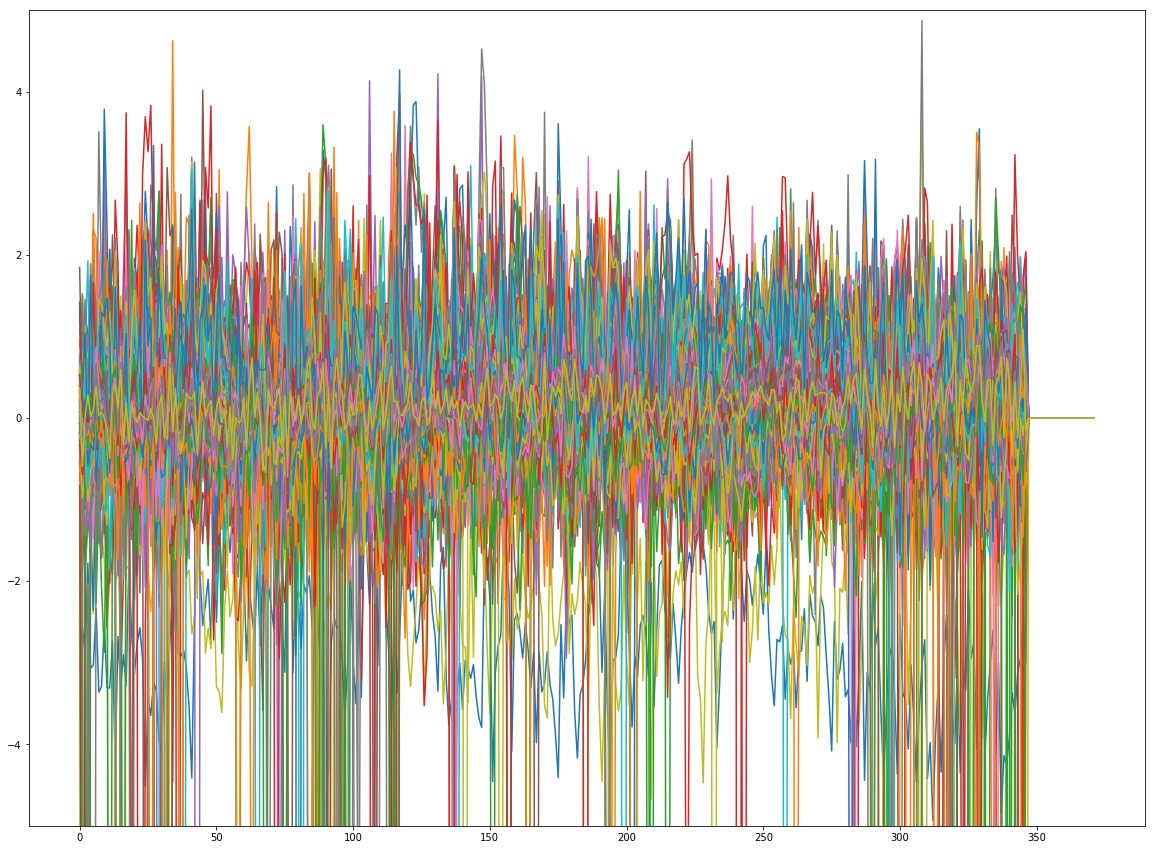

In [23]:
plt.figure(figsize=(20,15))

plt.ylim((-5,5))
for i in range(all_params.shape[1]):
    plt.plot(all_params[:, i])

Tau_inv_std = np.max(np.abs(all_diffs/43800))
Bo_std = np.std(all_params.flatten())

In [12]:
Tau_inv_std


0.011198447522533234

In [13]:
Bo_std

2.2819851106770668

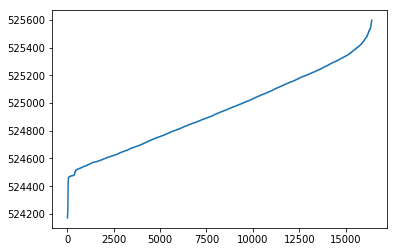

In [14]:
plt.plot(first_df.time)

In [15]:
sums = X.sum(axis=0)
for i in range(len(sums)):
    for j in range(i+1, len(sums)):
        if sums.iloc[i] == sums.iloc[j]:
            print(sums.index.values[i], sums.iloc[i])
            print(sums.index.values[j], sums.iloc[j])
            print(X.loc[:, sums.index.values[i]].equals(X.loc[:, sums.index.values[j]]))
            print("###########################")

CARRIER_HA 195.0
ORIGIN_SAN 195.0
False
###########################
CARRIER_HA 195.0
CRS_DEP_TIME_BLK_2200-2259 195.0
False
###########################
ORIGIN_ANC 46.0
DEST_ANC 46.0
False
###########################
ORIGIN_BDL 60.0
DEST_BDL 60.0
False
###########################
ORIGIN_BHM 44.0
DEST_BHM 44.0
False
###########################
ORIGIN_BNA 163.0
ORIGIN_HOU 163.0
False
###########################
ORIGIN_BNA 163.0
DEST_BNA 163.0
False
###########################
ORIGIN_BOS 316.0
ORIGIN_LGA 316.0
False
###########################
ORIGIN_BOS 316.0
DEST_BOS 316.0
False
###########################
ORIGIN_BUR 56.0
DEST_BUR 56.0
False
###########################
ORIGIN_BUR 56.0
DEST_OMA 56.0
False
###########################
ORIGIN_CHS 47.0
DEST_CHS 47.0
False
###########################
ORIGIN_CLE 107.0
ORIGIN_SMF 107.0
False
###########################
ORIGIN_CLE 107.0
DEST_SMF 107.0
False
###########################
ORIGIN_DAL 127.0
ORIGIN_RDU 127.0
False
######################

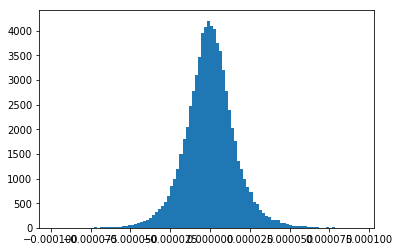

In [16]:
index = np.abs(all_diffs)/43800 < 0.0001
_=plt.hist(all_diffs[index]/43800, 100)

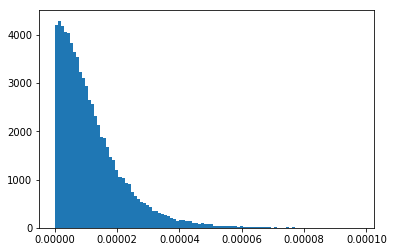

In [17]:
index = np.abs(all_diffs)/43800 < 0.0001
_=plt.hist(np.abs(all_diffs[index])/43800, 100)

In [18]:
np.max(np.abs(all_diffs/43800))

0.011198447522533234

In [19]:
pd.Series(np.abs(all_diffs/43800)).quantile(0.99)

5.6090482352091035e-05

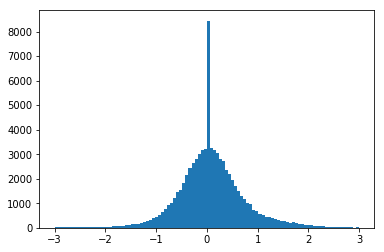

In [20]:
flat_params = all_params.flatten()
_=plt.hist(flat_params[np.abs(flat_params)<3], 100)

In [21]:
np.std(flat_params[np.abs(flat_params)<3])

0.653062244827513

In [3]:
import numpy as np
np.ones(10).shape

(10,)

In [16]:
times=np.array([0,1,3,6,8,99])
unique_times=np.array([0,1,2,3,4,5,6,7,8,9])
len(np.argwhere(times==unique_times[0]).squeeze())

TypeError: len() of unsized object